# Importing Packages

In [126]:
import pandas as pd
import numpy as np


# Importing Data

In [127]:
raw_csv_data = pd.read_csv("Index2018.csv")
df_comp = raw_csv_data.copy()

# Examining Data

 ### df_comp.head() 
 Prints the first 5 rows from the dataset.

In [128]:
df_comp.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


 ### df_comp.tail() 
 Prints the last 5 rows from the dataset.

In [129]:
df_comp.tail()

,date,spx,dax,ftse,nikkei
6264,23/01/2018,2839.130362,13559.60,7731.827774,24124.15
6265,24/01/2018,2837.544008,13414.74,7643.428966,23940.78
6266,25/01/2018,2839.253031,13298.36,7615.839954,23669.49
6267,26/01/2018,2872.867839,13340.17,7665.541292,23631.88
6268,29/01/2018,2853.528411,13324.48,7671.533300,23629.34


NOTE - df_comp prints the whole data set. This method is not efficient when we are dealing with very large datasets as it slows down the system.

In [130]:
df_comp

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.900000,2224.95,3445.980000,18124.01
1,10/01/1994,475.270000,2225.00,3440.580000,18443.44
2,11/01/1994,474.130000,2228.10,3413.770000,18485.25
3,12/01/1994,474.170000,2182.06,3372.020000,18793.88
4,13/01/1994,472.470000,2142.37,3360.010000,18577.26
...,...,...,...,...,...
6264,23/01/2018,2839.130362,13559.60,7731.827774,24124.15
6265,24/01/2018,2837.544008,13414.74,7643.428966,23940.78
6266,25/01/2018,2839.253031,13298.36,7615.839954,23669.49
6267,26/01/2018,2872.867839,13340.17,7665.541292,23631.88


 ### df_comp.describe()  
 Used to summarize the data set
 
 Omits column 'date' as it is not numeric.

##### count - number of rows in data set.
##### mean - average

In [131]:
df_comp.describe()

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


 We have a function for determining Not Available (NA) elements - 
 ### isna()

##### True -> Not Available
##### False -> Available

In [132]:
df_comp.isna()

,date,spx,dax,ftse,nikkei
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
6264,False,False,False,False,False
6265,False,False,False,False,False
6266,False,False,False,False,False
6267,False,False,False,False,False


 ### df_comp.isna() 
 Prints out a table which includes true and false values for all four market indexes in any time period.

To establish the number of missing values, we have to examine the whole table. Alternatively, we can use the sum() method of pandas.

NOTE --> 1 = True & 2 = False

In [133]:
df_comp.isna().sum()

date      0
spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

### df_comp.isna().sum() 
For each attribute, this will determine the number of instances without available information.

Determines and returns the number of missing values for each column of the data set.

Alternatively, we can specify which object we are interested in by referring to it instead of referring to the entire data frame.

For instance, if we are only interested in the S&P values, we should add '.spx' after the name of the data frame and re-run the cell.

In [134]:
df_comp.spx.isna().sum()

0

##### NOTE - This is convenient when we are dealing with a huge database, especially when there are too many individual columns we are not interested in.

# Plotting Data

In [135]:
import matplotlib.pyplot as plt

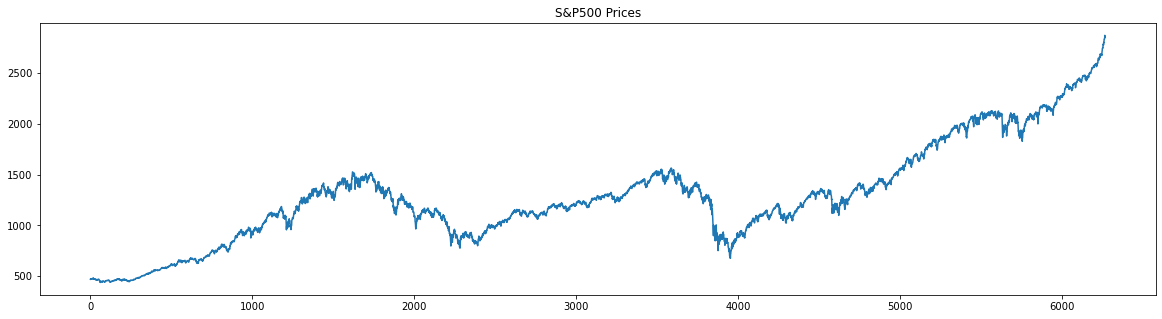

In [136]:
df_comp.spx.plot(figsize=(20,5), title = "S&P500 Prices")
plt.show()

The X axis contains numbers which represent the periods the values come from if we are dealing with proper time series data.
##### NOTE - In proper time series, the X-axis would show the corresponding dates for each period. For instance, period zero will express the first date of teh data set which is January 7th, 1994. This occurs because the indexes for each period are simply numeric values rather than dates.

The X-axis of the plots consist of numbers because these are the indices associated with each value.

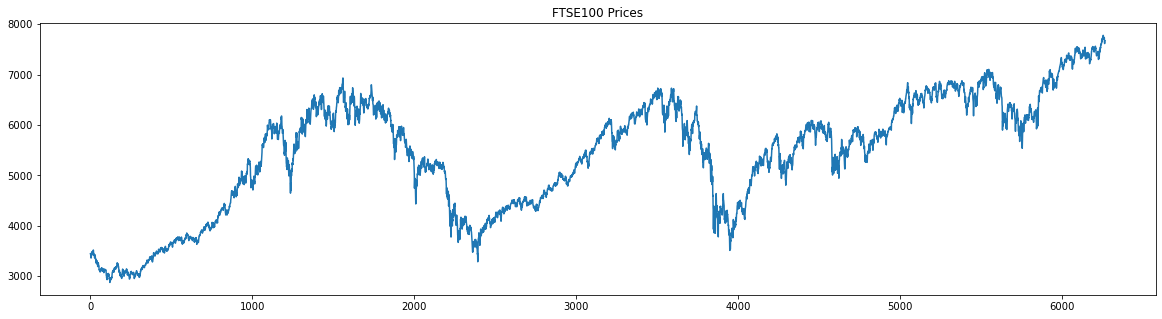

In [137]:
df_comp.ftse.plot(figsize=(20,5), title = "FTSE100 Prices")
plt.show()

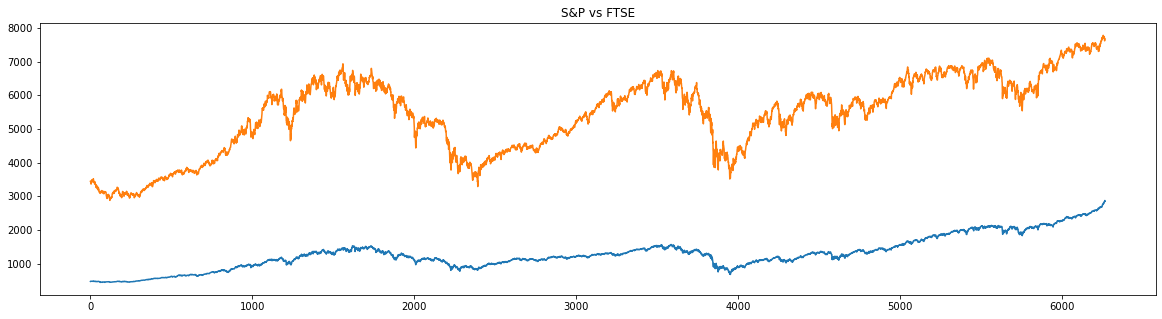

In [138]:
df_comp.spx.plot(figsize=(20,5), title = "S&P500 Prices")
df_comp.ftse.plot(figsize=(20,5), title = "FTSE100 Prices")
plt.title("S&P vs FTSE")
plt.show()

##### NOTE - We need to give a title to the new graph otherwise it will take the name of the last defined graph by default.

#### Observation from the above graph 
The S&P and the FTSE have vastly different magnitudes. This is one of the reasons Time Series analysis involves compounded returns along with prices.

# Quantile-Quantile (QQ) Plot 

The Quantile-Quantile (QQ) plot is a tool used in analytics to determine whether a data set is distributed in a certain way. Unless specified otherwise, the QQ plot showcases how the data fits a Normal Distribution.

In [139]:
import scipy.stats
import pylab

### scipy.stats.probplot(x, y)
where

x -> Series we want to test

y -> The way we want to express the plot

##### Suppose we were interested in the S&P, then we would add the following:

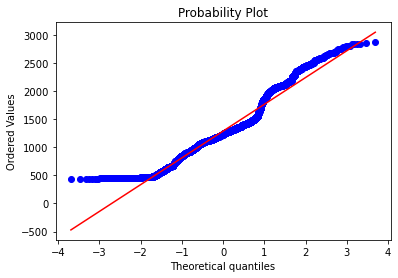

In [140]:
scipy.stats.probplot(df_comp.spx, plot = pylab)
pylab.show()

#### Purpose of QQ plot - To see if the values of a data set follow a given distribution.

The QQ plot takes all the values a variable can take and arranges them in accending order.

The Y-axis expresses the price with the highest ones at the top and the lowest at the bottom.

The X-axis represents the theoretical quantiles of the data set. Another explanation for this is how many standard deviations away from the mean these values are.

The red diagonal line represents what the data points should follow if they are Normally Distributed.

##### In this case, it is not normally distributed since we have more values around the '500' value on Y-axis. Therefore, the data is not normally distributed and we cannot use the elegant statistics of normal distributions to make successful forecasts. However, this is what we usually expect from TIME SERIES DATA.

### From Text to Date

pd.to_datetime(df_comp.date) converts the 'date' into date type from text. 

Assumes we are plugging in a string in a "mm/dd/yyyy" form.

Our data is saved in a "dd/mm/yyyy" format as well.

To convert it into "yyyy/mm/dd" format, we need add an argument, dayfirst = True.

In [141]:
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)

In [142]:
df_comp.head()

,date,spx,dax,ftse,nikkei
0,1994-01-07,469.90,2224.95,3445.98,18124.01
1,1994-01-10,475.27,2225.00,3440.58,18443.44
2,1994-01-11,474.13,2228.10,3413.77,18485.25
3,1994-01-12,474.17,2182.06,3372.02,18793.88
4,1994-01-13,472.47,2142.37,3360.01,18577.26


In [143]:
df_comp.date.describe(datetime_is_numeric=True)

count                             6269
mean     2006-01-14 19:36:59.492742144
min                1994-01-07 00:00:00
25%                2000-01-11 00:00:00
50%                2006-01-12 00:00:00
75%                2012-01-19 00:00:00
max                2018-01-29 00:00:00
Name: date, dtype: object

##### Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.

### Setting the index

To refer to a set of values as a time series, each one should correspond to a time period. This is crucial for referring to values according to the day they were recorded. Moreover, we often wish to examine specific chunks of data between two concrete dates.

For example - Analysis of the Great Recession usually involves separating the data before and after September 15, 2008, the day Lehman Brothers filed for bankruptcy.

### df_comp.set_index("x", inplace)

x -> Data frame attribute we intend to use

inplace -> (Optional argument) True = Tells Python to save this new data frame in the place of one with integer indexes.

In [144]:
df_comp.set_index("date", inplace = True)

In [145]:
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


#### df_comp.date.describe()

#### We get the following error:
---------------------------------------------------------------------------
AttributeError                            Traceback (most recent call last)
/var/folders/c7/4mz8b4614h5b4wz67llrjyqw0000gn/T/ipykernel_25392/49469409.py in <module>
----> 1 df_comp.date.describe()

~/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py in __getattr__(self, name)
   5485         ):
   5486             return self[name]
-> 5487         return object.__getattribute__(self, name)
   5488 
   5489     def __setattr__(self, name: str, value) -> None:

AttributeError: 'DataFrame' object has no attribute 'date'

##### Explanation - Once "date" becomes an index, we no longer save its values as a separate attribute in the data frame.

#### Why do we decide to use the dates the values were recorded as indices, instead of any of the other column?

Because all the other columns would automatically become time series, since there is a time period attached to each value.

#### Setting the Desired Frequency

Allows us to set the frequency of a dataset to turn into a time series using the 
#### 'asfreq()' method.

The values this argument can take are specific letters of the alphabet.

##### h -> hourly
##### w -> weekly
##### d -> daily
##### m - monthly
##### a -> annual

##### NOTE -
Data measured once per year is annual rather than yearly so we use 'a' instead of 'y'.

In [146]:
df_comp = df_comp.asfreq('d')

In [147]:
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-08,NaN,NaN,NaN,NaN
1994-01-09,NaN,NaN,NaN,NaN
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25


##### NOTE - '1994-01-08' and '1994-01-09' are weekend dates and have 'NaN' values. This means we have generated new periods, which do not have values associated with them.

Another pecularity of our data is that it represents the closing prices of financial indices and these prices can only be recorded during working days. Therefore, we are not interested in any weekends or holidays.

In [148]:
df_comp = df_comp.asfreq('b')

##### b - business days

Setting the frequency to business days avoids adding any unnecessary time periods. It tells Python to expect missing values when the date fails on a Saturday or Sunday.

In [149]:
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


#### Handling Missing Values

In [150]:
df_comp.isna()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,False,False,False,False
1994-01-10,False,False,False,False
1994-01-11,False,False,False,False
1994-01-12,False,False,False,False
1994-01-13,False,False,False,False
...,...,...,...,...
2018-01-23,False,False,False,False
2018-01-24,False,False,False,False
2018-01-25,False,False,False,False


##### True = 1 -> missing value for the period
##### False = 0 -> no missing value for the period

In [151]:
df_comp.isna().sum()

spx       8
dax       8
ftse      8
nikkei    8
dtype: int64

##### NOTE - Setting the frequency to "business days" have generated 8 dates for which we have no data available.

### finllna() method
Goes through the entire time series and fills out missing values in several different ways like the following:

#### 1. Front Filling
Assigns the value of the previous period.

#### 2. Back Filling
Assigns the value of the next period.

#### 3. Assigning the same value
Assign the average to all the missing values within the time-series.

##### NOTE - Depending on our data, we may opt for only one or a combination of methods. 

##### Usually filling missing values with the mean is a bad approach when it comes to Time series because there are underlying time variant patterns in the data. This approach is appropriate only when the data heavily fluctuates around the mean from the first to the last day.

In [152]:
df_comp.spx = df_comp.ftse.fillna(method = "ffill")

In [153]:
df_comp.isna().sum()

spx       0
dax       8
ftse      8
nikkei    8
dtype: int64

In [154]:
df_comp.ftse = df_comp.spx.fillna(method = "bfill")

In [155]:
df_comp.isna().sum()

spx       0
dax       8
ftse      0
nikkei    8
dtype: int64

##### NOTE - Unlike front filling or back filling, assigning the same value to all the missing observations does not require defining the method argument.
##### Instead, it requires passing a number or expression to the value argument 
##### Since we want to set all missing values to equal the average, we need to call the mean() method. More precisely, we need to set the value parameter to equal whatever the mean method outputs.

In [156]:
df_comp.dax = df_comp.dax.fillna(value = df_comp.dax.mean())

In [157]:
df_comp.isna().sum()

spx       0
dax       0
ftse      0
nikkei    8
dtype: int64

In [158]:
df_comp.nikkei = df_comp.nikkei.fillna(value = df_comp.nikkei.mean())

In [159]:
df_comp.isna().sum()

spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

### Simplifying the Dataset

We will be analyzing how the S&P 500 performs and therefore, we can remove the FTSE, DAX, and NIKKEI columns for two main reasons.

1. The less data we load, the faster we can manipulate it. It can significantly affect high frequency data with hundreds of thousands of observations.

2. Clarity - Easier to keep track of dataset. Dropping the four columns makes it easier to keep track of any new series, we might add to the data set.

In analysis, we often keep copies of any major modifications to the data, therefore we can expect to have additional columns in our data set as we analyse the results.



In [160]:
df_comp['market_value'] = df_comp.spx

In [161]:
df_comp.describe()

,spx,dax,ftse,nikkei,market_value
count,6277.000000,6277.000000,6277.000000,6277.000000,6277.000000
mean,5423.679824,6080.063363,5423.679824,14597.055700,5423.679824
std,1145.616719,2752.604984,1145.616719,4040.545253,1145.616719
min,2876.600000,1911.700000,2876.600000,7054.980000,2876.600000
25%,4486.730000,4070.460000,4486.730000,10711.090000,4486.730000
50%,5663.300000,5774.380000,5663.300000,15014.040000,5663.300000
75%,6304.630175,7442.660000,6304.630175,17858.420000,6304.630175
max,7778.637689,13559.600000,7778.637689,24124.150000,7778.637689


In [162]:
del df_comp['spx']

'del' deletes the particular column.

In [163]:
df_comp.describe()

,dax,ftse,nikkei,market_value
count,6277.000000,6277.000000,6277.000000,6277.000000
mean,6080.063363,5423.679824,14597.055700,5423.679824
std,2752.604984,1145.616719,4040.545253,1145.616719
min,1911.700000,2876.600000,7054.980000,2876.600000
25%,4070.460000,4486.730000,10711.090000,4486.730000
50%,5774.380000,5663.300000,15014.040000,5663.300000
75%,7442.660000,6304.630175,17858.420000,6304.630175
max,13559.600000,7778.637689,24124.150000,7778.637689


In [164]:
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']

In [165]:
df_comp.describe()

,market_value
count,6277.000000
mean,5423.679824
std,1145.616719
min,2876.600000
25%,4486.730000
50%,5663.300000
75%,6304.630175
max,7778.637689


### Splitting the Data

To conduct machine learning on our dataset, we need to split data into 2 sets:

1. Training Set
2. Testing Set

Compare predictions to actual values. 

The closer the forecasts, the better the model.

For many different methods, we would shuffle the data before splitting it to make both sets equally representative.

However, time series data relies on keeping the chronological order of the values within the set. This makes shuffling impossible.

Training Set in time series: From the beginning up to some cut off point.

Testing Set: From the cut off point until the end.

##### NOTE - The appropriate size of the training set is debatable. 

1. If it's too large, the model will fit the training set too well and will perform poorly with the new data.

------------------------------------> ---------------->
       
    Large training set | Small testing set

2. If it's too small, we won't be able to create a model accurate enough.

        -----------------> --------------------->
       Small training set | Large/Small testing set
        
##### NOTE - An 80-20 split between the training and testing set is reasonable.

To Split the data, we need to use the 'iloc()' method (The name 'iloc' comes from index location).

##### NOTE - To successfully implement the iloc() method, we must know where the first set finishes and the second one begins.

To achieve the cut off point, we make use of the 'len' function which returns the length of an object in Python.

Find the length of the entire set, and take 80% of that.

In [166]:
size = int(len(df_comp)*0.8)

##### training set - df
##### testing set - df_test

In [167]:
df = df_comp.iloc[:size]
df_test = df_comp.iloc[size:]

In [168]:
df.tail()

,market_value
date,
2013-04-01,6411.74
2013-04-02,6490.66
2013-04-03,6420.28
2013-04-04,6344.11
2013-04-05,6249.77


In [169]:
df_test.head()

,market_value
date,
2013-04-08,6276.94
2013-04-09,6313.20
2013-04-10,6387.37
2013-04-11,6416.14
2013-04-12,6384.39
